In [80]:
# Importing all libraries that needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Read from csv data source
customer_data = pd.read_csv('../datasets/customer-data.csv')

In [82]:
# Previous data preparation

# Input missing values with mean credit score for each income group
def input_creditscore(income_classes):
    for income_class in income_classes:      
        # subset of dataframe to use as filter
        filter = customer_data['income'] == income_class
        
        # calculate the mean for each income group
        mean = customer_data[customer_data['income'] == income_class]['credit_score'].mean()
        
        # input the missing values with mean of credit score for each income group
        customer_data.loc[filter,"credit_score"] = customer_data.loc[filter,'credit_score'].fillna(mean)

income_groups = customer_data['income'].unique()
input_creditscore(income_groups)

# Delete id and postal_code columns
customer_data.drop(["id","postal_code"],axis=1,inplace=True)

In [83]:
customer_data['credit_score']

0       0.629027
1       0.357757
2       0.493146
3       0.206013
4       0.388366
          ...   
9995    0.582787
9996    0.522231
9997    0.470940
9998    0.364185
9999    0.435225
Name: credit_score, Length: 10000, dtype: float64

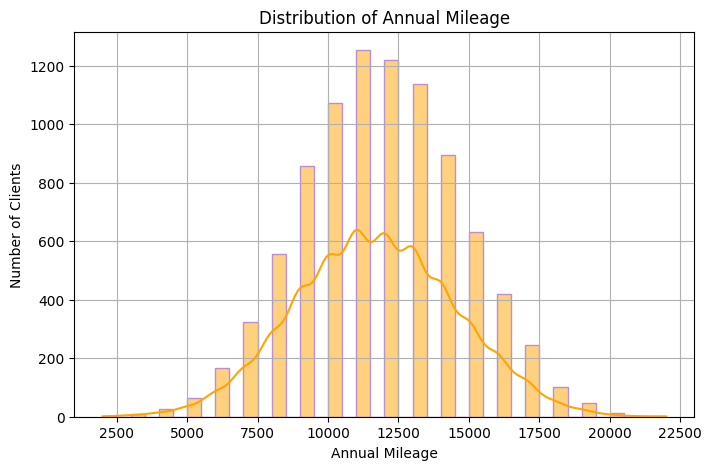

In [84]:
# Show the distribution with histogram plot 
plt.figure(figsize=[8,5])
sns.histplot(data=customer_data,x='annual_mileage',bins=40,color='orange',edgecolor='#BB8FCE', kde=True).set(title='Distribution of Annual Mileage',
                                                                                                           xlabel='Annual Mileage',ylabel='Number of Clients')
plt.grid(True)
plt.show()

In [85]:
# Check the mean credit annual_mileage for each driving_experience group
customer_data.groupby(by='driving_experience')['annual_mileage'].mean()

driving_experience
0-9y      12249.131670
10-19y    11791.275168
20-29y    11144.181256
30y+      10694.968553
Name: annual_mileage, dtype: float64

In [86]:
# Check the mean credit annual_mileage for etire annual_mileage column
customer_data['annual_mileage'].mean()

11697.003206900365

In [87]:
# Filling missing data on annual_mileage column

customer_data.groupby(by='driving_experience')['annual_mileage'].mean()
mean_mileage = customer_data['annual_mileage'].mean()
customer_data['annual_mileage']=customer_data['annual_mileage'].fillna(mean_mileage)

In [88]:
customer_data.isna().sum()

age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

Count of customer for gender education:
 education
high school    4157
university     3928
none           1915
Name: count, dtype: int64



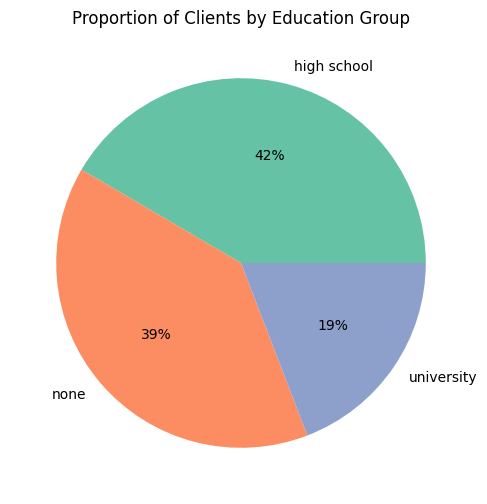

In [89]:
# Categorical orderes: education column

# Check count for each category in the education column
print(f'Count of customer for gender education:\n {customer_data['education'].value_counts()}\n')

# Visualize with pie chart
# Define plot size
plt.figure(figsize=[6,6])

# Define column to use
data = customer_data["education"].value_counts(normalize=True)

# Define labels
labels = np.unique(customer_data['education'])

# Define color palette
colors = sns.color_palette('Set2')

# Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title('Proportion of Clients by Education Group')
plt.show()


In [90]:
print(f'mean: {np.mean(customer_data['credit_score'])}')
print(f'max: {np.max(customer_data['credit_score'])}')
print(f'min: {np.min(customer_data['credit_score'])}')
print(f'standar deviation: {np.std(customer_data['credit_score'])}')

mean: 0.5152471698892113
max: 0.9608188278116948
min: 0.0533575454627435
standar deviation: 0.13462143272479846


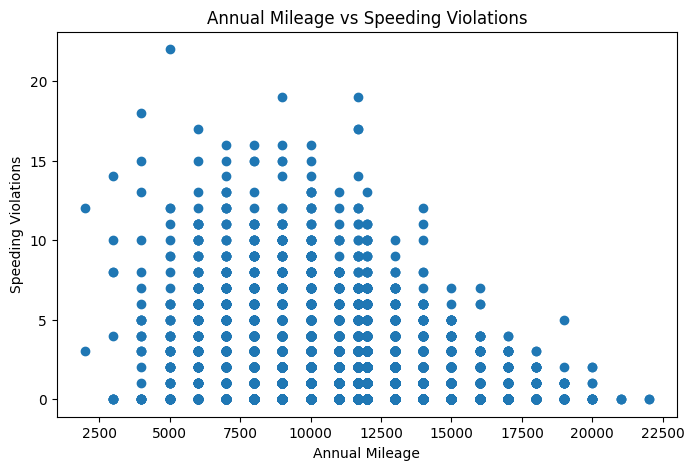

In [91]:
# Numeric-numeric analysis to show relationship between annual_mileage and speeding_violations

plt.figure(figsize=[8,5])
plt.scatter(data=customer_data,x='annual_mileage',y='speeding_violations')
plt.title('Annual Mileage vs Speeding Violations')
plt.ylabel('Speeding Violations')
plt.xlabel('Annual Mileage')
plt.show()

[Text(0.5, 1.0, 'Claim Probability by Education'),
 Text(0, 0.5, 'Claim Probability'),
 Text(0.5, 0, 'Education')]

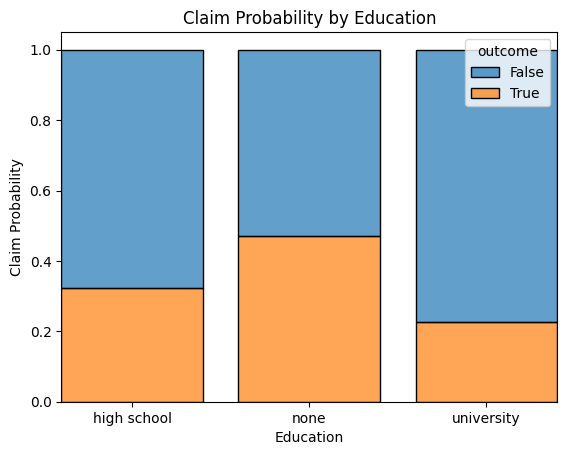

In [92]:
# Numeric-categorical analysis to show relationship between education class of clients and claim probability, based-on outcome data

ax=sns.histplot(customer_data, x='education', hue='outcome',stat='probability', multiple='fill', shrink=.8,alpha=0.7)
ax.set(title='Claim Probability by Education',ylabel='Claim Probability',xlabel='Education')

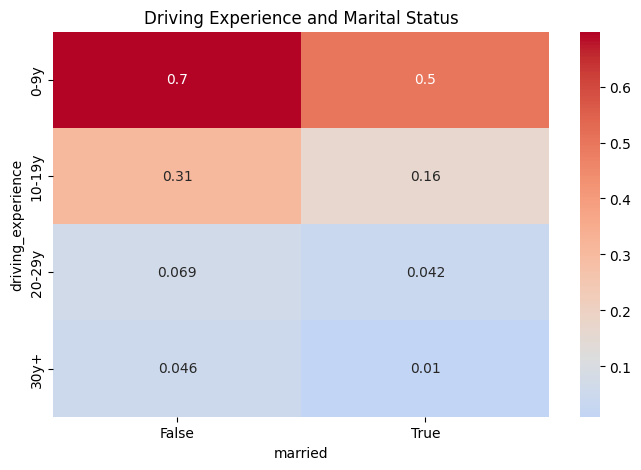

In [93]:
# Multivariate analysis to show relationship between driving_experience and marital status variables by using a third variable, claim rate

customer_data['claim_rate'] = np.where(customer_data['outcome']==True,1,0)

# Create a pivot table for driving_experience and marital status with average claim rate as values
driving_experience_marital_status = pd.pivot_table(data=customer_data,index='driving_experience',columns='married',values='claim_rate',aggfunc='mean')

# Create a heatmap plot to visualize driving_experience, marital status and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(driving_experience_marital_status,annot=True,cmap='coolwarm',center=0.117)
plt.title('Driving Experience and Marital Status')
plt.show()